In [12]:
import requests
import pandas as pd

import sidrapy

In [13]:
import sidrapy

# Exemplo de consulta para dados de renda por bairro em Ribeirão Preto
data = sidrapy.get_table(
    table_code="3175",  
    territorial_level="9",  # Nível territorial (6 para bairros)
    ibge_territorial_code="35014",  # Código do município de Ribeirão Preto
    period="last"  # Período (último disponível)
)

# Transformar os dados em um DataFrame do pandas para facilitar a manipulação
import pandas as pd

df = pd.DataFrame(data)
print(len(df))
df


2


,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N,D5C,D5N,D6C,D6N,D7C,D7N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Microrregião Geográfica (Código),Microrregião Geográfica,Ano (Código),Ano,Variável (Código),Variável,Situação do domicílio (Código),Situação do domicílio,Sexo (Código),Sexo,Cor ou raça (Código),Cor ou raça,Idade (Código),Idade
1,9,Microrregião Geográfica,45,Pessoas,1032547,35014,Ribeirão Preto (SP),2010,2010,93,População residente,0,Total,0,Total,0,Total,0,Total


In [24]:
dados = pd.read_csv("../data/CelularesSubtraidos_2023_2024_rp.csv")
print(len(dados))
dados=dados.drop('Unnamed: 0.1', axis=1)
dados=dados.drop('Unnamed: 0', axis=1)
# dados

5882


In [16]:
dados.columns

Index(['ID_DELEGACIA', 'NOME_DEPARTAMENTO', 'NOME_SECCIONAL', 'NOME_DELEGACIA',
       'NOME_MUNICIPIO', 'ANO_BO', 'NUM_BO', 'VERSAO',
       'NOME_DEPARTAMENTO_CIRC', 'NOME_SECCIONAL_CIRC', 'NOME_DELEGACIA_CIRC',
       'NOME_MUNICIPIO_CIRC', 'DATA_OCORRENCIA_BO', 'HORA_OCORRENCIA',
       'DESCRICAO_APRESENTACAO', 'DATAHORA_REGISTRO_BO', 'DATA_COMUNICACAO_BO',
       'DATAHORA_IMPRESSAO_BO', 'DESCR_PERIODO', 'AUTORIA_BO',
       'FLAG_INTOLERANCIA', 'TIPO_INTOLERANCIA', 'FLAG_FLAGRANTE',
       'FLAG_STATUS', 'DESC_LEI', 'FLAG_ATO_INFRACIONAL', 'RUBRICA',
       'DESCR_CONDUTA', 'DESDOBRAMENTO', 'CIRCUNSTANCIA', 'DESCR_TIPOLOCAL',
       'DESCR_SUBTIPOLOCAL', 'CIDADE', 'BAIRRO', 'CEP', 'LOGRADOURO_VERSAO',
       'LOGRADOURO', 'NUMERO_LOGRADOURO', 'LATITUDE', 'LONGITUDE',
       'CONT_OBJETO', 'DESCR_MODO_OBJETO', 'DESCR_TIPO_OBJETO',
       'DESCR_SUBTIPO_OBJETO', 'DESCR_UNIDADE', 'QUANTIDADE_OBJETO',
       'MARCA_OBJETO', 'FLAG_BLOQUEIO', 'FLAG_DESBLOQUEIO', 'MES', 'ANO',
       '

In [40]:
df = dados.dropna(subset=['LATITUDE', 'LONGITUDE'])
    
df = df[(df['LATITUDE'] >= -21.25) & (df['LATITUDE'] <= -21.10) &
        (df['LONGITUDE'] >= -47.90) & (df['LONGITUDE'] <= -47.70)]


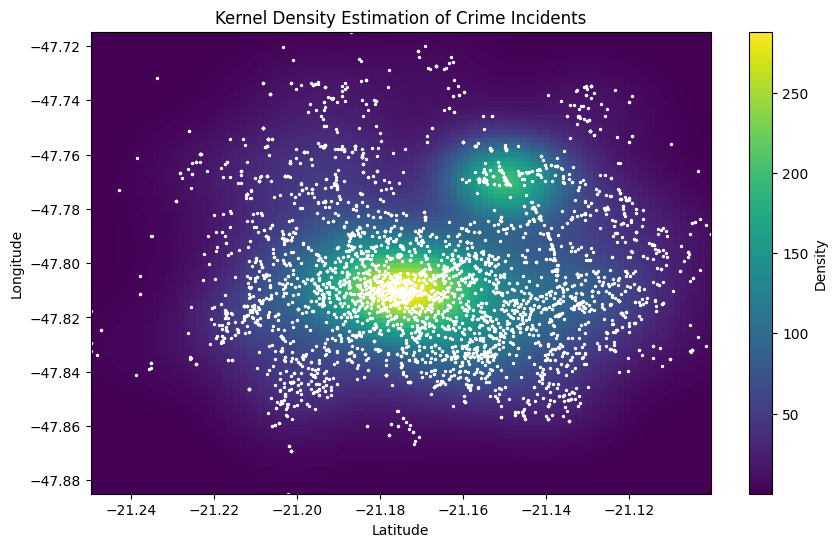

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity


# Preparar os dados para KDE
xy = np.vstack([df['LATITUDE'], df['LONGITUDE']])
kde = KernelDensity(bandwidth=0.01, kernel='gaussian')
kde.fit(xy.T)

# Avaliar a densidade em uma grade
x = np.linspace(df['LATITUDE'].min(), df['LATITUDE'].max(), 100)
y = np.linspace(df['LONGITUDE'].min(), df['LONGITUDE'].max(), 100)
xv, yv = np.meshgrid(x, y)
grid_points = np.vstack([xv.ravel(), yv.ravel()]).T
z = np.exp(kde.score_samples(grid_points)).reshape(100, 100)

# Plotar os resultados da KDE
plt.figure(figsize=(10, 6))
plt.imshow(z, origin='lower', aspect='auto', extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis')
plt.colorbar(label='Density')
plt.scatter(df['LATITUDE'], df['LONGITUDE'], c='white', s=2)
plt.title('Kernel Density Estimation of Crime Incidents')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()


In [45]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.neighbors import KernelDensity


# Preparar os dados para KDE
xy = np.vstack([df['LATITUDE'], df['LONGITUDE']])
kde = KernelDensity(bandwidth=0.01, kernel='gaussian')
kde.fit(xy.T)

# Avaliar a densidade em uma grade
x = np.linspace(df['LATITUDE'].min(), df['LATITUDE'].max(), 100)
y = np.linspace(df['LONGITUDE'].min(), df['LONGITUDE'].max(), 100)
xv, yv = np.meshgrid(x, y)
grid_points = np.vstack([xv.ravel(), yv.ravel()]).T
z = np.exp(kde.score_samples(grid_points)).reshape(100, 100)

# Criar o gráfico KDE com Plotly
fig = go.Figure()

# Adicionar o heatmap
fig.add_trace(go.Heatmap(
    z=z,
    x=x,
    y=y,
    colorscale='Viridis'
))

# Adicionar os pontos
fig.add_trace(go.Scatter(
    x=df['LATITUDE'],
    y=df['LONGITUDE'],
    mode='markers',
    marker=dict(color='white', size=5),
    name='Crime Incidents'
))

# Configurar o layout do modo escuro
fig.update_layout(
    title='Kernel Density Estimation',
    xaxis_title='Latitude',
    yaxis_title='Longitude',
    template='plotly_dark',
    paper_bgcolor='rgb(14, 17, 23)',  # Cor de fundo do Streamlit (dark mode)
    plot_bgcolor='rgb(14, 17, 23)'    # Cor de fundo do gráfico
    ,    width=800,
    height=600
)

# Salvar como HTML
pio.write_html(fig, file='../results/kde_plot.html', auto_open=True)


In [38]:
import folium

# Definir as coordenadas do primeiro polígono
polygon_coords1 = [
    [-21.19, -47.82],
    [-21.19, -47.80],
    [-21.16, -47.80],
    [-21.16, -47.82],
    [-21.19, -47.82]
]

# Definir as coordenadas do segundo polígono
polygon_coords2 = [
    [-21.16, -47.78],
    [-21.16, -47.76],
    [-21.13, -47.76],
    [-21.13, -47.78],
    [-21.16, -47.78]
]

# Criar o mapa centralizado na área de interesse
m = folium.Map(location=[-21.175, -47.81], zoom_start=13)

# Adicionar o primeiro polígono ao mapa
folium.Polygon(
    polygon_coords1,
    color='blue',
    fill=True,
    fill_color='blue',
    fill_opacity=0.2
).add_to(m)

# Adicionar o segundo polígono ao mapa
folium.Polygon(
    polygon_coords2,
    color='green',
    fill=True,
    fill_color='green',
    fill_opacity=0.2
).add_to(m)

# Mostrar o mapa
# m.save('map_with_polygons.html')
m


A Análise de Densidade de Kernel (KDE) é uma técnica estatística usada para estimar a densidade de uma variável contínua. No contexto dos dados geolocalizados, como os incidentes de crimes, o KDE pode ser usado para estimar a densidade espacial dos incidentes e identificar áreas de alta concentração.

O que a KDE Faz?
Estimativa da Densidade:
A KDE cria uma função de densidade suave que representa a distribuição dos pontos de dados.
Ao invés de contar o número de incidentes em uma área fixa (como em histogramas ou heatmaps), a KDE calcula a densidade de pontos em cada localização baseada em uma função kernel.

Suavização:
A KDE aplica uma função kernel em torno de cada ponto de dado e soma essas funções para obter uma densidade total.

Visualização de Hotspots:
A KDE é particularmente útil para identificar "hotspots" ou áreas de alta concentração de incidentes.

A Análise de Densidade de Kernel (KDE) é uma técnica utilizada para estimar a densidade de pontos em uma área geográfica. 
Funciona aplicando uma função de densidade de probabilidade (kernel) ao redor de cada ponto de dado, resultando em uma superfície contínua que indica a concentração dos pontos. Isso permite identificar áreas de alta densidade, ou "hotspots", facilitando a visualização de padrões e tendências espaciais. É amplamente utilizada em diversas disciplinas da engenharia para planejamento urbano, estudos de impacto ambiental, entre outros​.
- Utilizamos a função kernel gaussiana, uma função de densidade de probabilidade que suaviza a influência dos pontos de dados ao redor de cada ponto.

Fórmula da Função de Densidade de Kernel
A densidade estimada 


A Análise de Densidade de Kernel (KDE) é uma técnica estatística utilizada para estimar a densidade de uma variável contínua. No contexto de dados geolocalizados, como incidentes de crimes, a KDE é aplicada para identificar áreas de alta concentração, ou "hotspots", permitindo a visualização e análise de padrões espaciais.

### Metodologia

1. **Coleta e Limpeza dos Dados:**
   - Os dados de localização dos incidentes de crimes foram coletados, contendo coordenadas de latitude e longitude.
   - Os dados foram filtrados para incluir apenas incidentes dentro de uma área específica de interesse.

2. **Definição da Função Kernel:**
   - Utilizamos a função kernel gaussiana, uma função de densidade de probabilidade que suaviza a influência dos pontos de dados ao redor de cada ponto.

3. **Aplicação da Função Kernel e Cálculo da Densidade:**
   - Para cada ponto de dado, aplicamos a função kernel, criando uma superfície contínua que representa a densidade dos incidentes.
   - Ajustamos a largura de banda (bandwidth) para controlar o nível de suavização.

### Fórmulas Utilizadas

**Estimativa da Densidade Kernel:**

\[ \hat{f}(x) = \frac{1}{n h} \sum_{i=1}^{n} K \left( \frac{x - x_i}{h} \right) \]

onde:
- \( \hat{f}(x) \) é a estimativa da densidade no ponto \( x \),
- \( n \) é o número total de pontos de dados,
- \( h \) é a largura de banda (bandwidth),
- \( K \) é a função kernel,
- \( x_i \) são os pontos de dados.

**Função Kernel Gaussiana:**

\[ K(u) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}u^2} \]

### Resultados

O mapa de calor gerado pela KDE revelou várias áreas de alta densidade de incidentes de crimes, identificando claramente os hotspots. As áreas de maior concentração foram destacadas em cores mais intensas, permitindo uma fácil visualização dos padrões espaciais.

### Conclusão

A Análise de Densidade de Kernel (KDE) provou ser uma ferramenta eficaz para identificar e visualizar hotspots de crimes em uma área geográfica. Ajustar a largura de banda permitiu um balanceamento entre detalhamento local e suavização global, proporcionando uma compreensão clara dos padrões de distribuição espacial dos incidentes.
